In [1]:
!pip install finance-datareader

     ---------------------------------------- 78.4/78.4 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 45.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\zeze1\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
from model import cnn_lstm_conv1d as cnn_lstm
import FinanceDataReader as fdr

data = fdr.DataReader('005930', '2010-01-01')
data = cnn_lstm.erase_zero(data)
train_X, train_Y, test_X, test_Y = cnn_lstm.create_window_set(data, column=3, window_size=50)
model = cnn_lstm.build_model(window_size=50)
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40, batch_size=64, verbose=1, shuffle =False)


Epoch 1/40
39/39 [==============================] - 5s 28ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0686 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0674
Epoch 2/40
39/39 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0505 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0483
Epoch 3/40
39/39 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0462 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0410
Epoch 4/40
39/39 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0437 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0399
Epoch 5/40
39/39 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0417 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0391
Epoch 6/40
39/39 [==============================] - 0s 7ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0408 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0369
Epoch 7/40
39/39 [=========

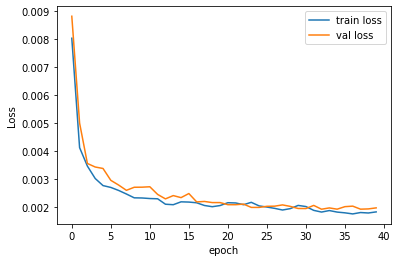

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

20/20 [==============================] - 1s 2ms/step


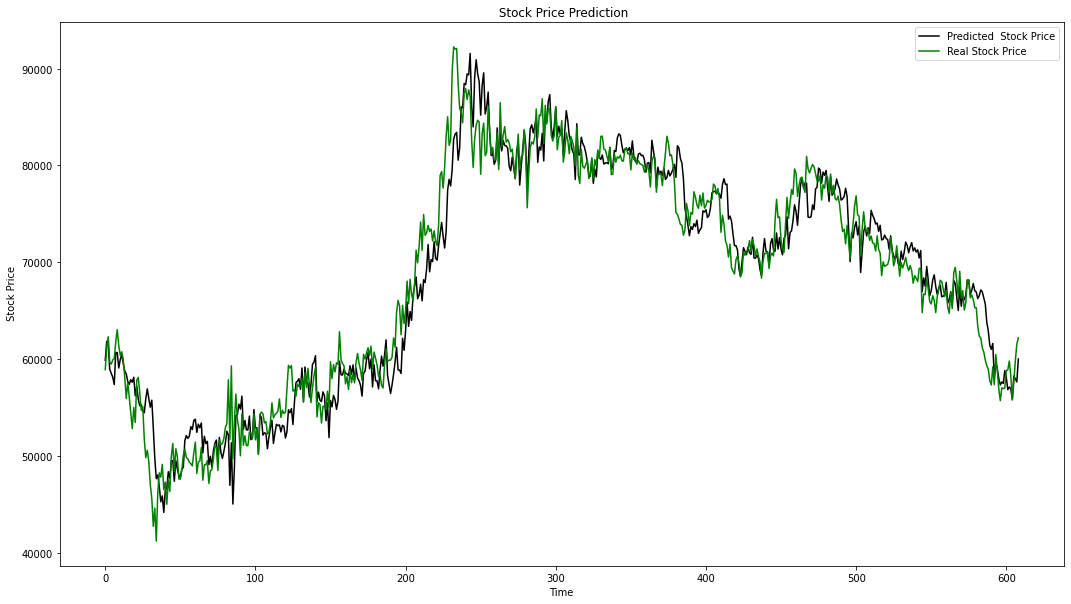

In [13]:
cnn_lstm.predict(model, data[len(train_X):],3,test_X, test_Y)